# Librerías

In [655]:
import pandas as pd
import numpy as np
from ast import literal_eval  # Para convertir str a una lista organizada
import re

# Lectura de base de datos

In [656]:
df_casas = pd.read_csv("01_casas_idealista.csv", encoding = "utf-16", sep=";")
df_casas.head()

,Titulo,Localización,precio,caracteristicas básicas,Equipamento
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"['Chalet pareado', '3 plantas', '254 m² constr...","['Jardín', 'Consumo: \n174 kWh/m² año', 'Emisi..."
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"['Chalet pareado', '3 plantas', '254 m² constr...","['Jardín', 'Consumo: \n174 kWh/m² año', 'Emisi..."
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,"['Casa de pueblo', '4 plantas', '241 m² constr...","['Consumo: \n208 kWh/m² año', 'Emisiones: \n43..."
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,"['Casa o chalet independiente', '2 plantas', '...","['Piscina', 'Jardín', 'Consumo: \n174 kWh/m² a..."
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,"['Casa o chalet independiente', '1 planta', '2...","['Piscina', 'Jardín', 'Consumo: \n99 kWh/m² añ..."


In [657]:
df_casas["caracteristicas básicas"][0]

"['Chalet pareado', '3 plantas', '254 m² construidos, 165 m² útiles', '5 habitaciones', '4 baños', 'Parcela de 268 m²', 'Terraza y balcón', 'Plaza de garaje incluida en el precio', 'Segunda mano/buen estado', 'Armarios empotrados', 'Trastero', 'Orientación sur, este', 'Construido en 1995', 'Calefacción individual']"

# Convertir str a una lista organizada
En nuestra base de datos tenemos que las columnas de "Caracteristicas básicas" y "Equipamento" tienen datos str pero que en realidad son listas, las tenemos que convertir de str a unas listas organizadas más faciles de manejar

In [658]:
df_casas = pd.read_csv("casas_idealista.csv", encoding = "utf-16", sep=";", converters={"caracteristicas básicas": literal_eval, "Equipamento": literal_eval})
df_casas.head()

,Titulo,Localización,precio,caracteristicas básicas,Equipamento
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:..."
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:..."
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,"[Casa de pueblo, 4 plantas, 241 m² construidos...","[Consumo: \n208 kWh/m² año, Emisiones: \n43 kg..."
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,"[Casa o chalet independiente, 2 plantas, 249 m...","[Piscina, Jardín, Consumo: \n174 kWh/m² año, E..."
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,"[Casa o chalet independiente, 1 planta, 241 m²...","[Piscina, Jardín, Consumo: \n99 kWh/m² año, Em..."


In [659]:
df_casas["caracteristicas básicas"][0]

['Chalet pareado',
 '3 plantas',
 '254 m² construidos, 165 m² útiles',
 '5 habitaciones',
 '4 baños',
 'Parcela de 268 m²',
 'Terraza y balcón',
 'Plaza de garaje incluida en el precio',
 'Segunda mano/buen estado',
 'Armarios empotrados',
 'Trastero',
 'Orientación sur, este',
 'Construido en 1995',
 'Calefacción individual']

# Definición de funciones

# 1. Match_property

In [660]:
'''property --> se refiere a la propiedad en la que quiero buscar alguna palabra, en este caso "con trastero"
   patterns --> se refiere a la palabra que quiero buscar dentro de la propeidad, en este caso "con" y será una lista '''

def match_property(property, patterns):
    for pat in patterns:
        match_prop = re.search(pat, property) # Buscar el patrón en el property que le estoy dando
        
        if match_prop:                        # "if match_prop": quiere decir, si match_prop es verdad entonces, dame un True, sino un False
            return True
    return False

In [661]:
'''Prueba de la función creada
   ¿Está "con" en "con trastero?" en caso de estar imprimir True, sino imprimir False'''

match_property("con trastero", ["con"])

True

Esta función será util ya que si le proporciono una lista con varios elementos le puedo decir, cuando encuentres la palabra "con" en esta lista, acá debes actuar

# 2. Check_property --> cumple la misma función que match_property pero me arroja 0 o 1

In [662]:
def check_property(property, patterns):
    for pat in patterns:
        check = re.search(pat, property) # Buscar el patrón en el property que le estoy dando
        
        if check:                        # "if check": quiere decir, si check es verdad entonces, dame un 1, sino un 0
            return 1
    return 0

In [663]:
'''Prueba de la función creada
   ¿Está "con" en "con trastero?" en caso de estar imprimir 1 si no imprimir 0'''

check_property("con trastero", ["con"])

1

# 3. Get_number --> Me busca los numeros en un str

In [664]:
def get_number(property):
    nums = re.findall(r"\d+", property)
    if len(nums) == 2:
        return int(nums[0]+nums[1])  # "40.000" -> "40" + "000" -> "40000" -> 40000
    else:
        return int(nums[0])

In [665]:
re.findall(r"\d+", "2 baños")

['2']

In [666]:
get_number("2 baños")

2

In [667]:
get_number("40.000 de precio")

40000

# 4. Get_ascensor

In [668]:
'''Features --> es la lista de caracteristica que le voy dar a mi función'''

def get_ascensor(features):
    for prop in features:
        
        '''.lower() --> lo hace todo minuscula
           .strip() --> le quita los espacios
           
           Primero estoy buscando donde aparece con ascensor, si aparece voy a activarlo y voy a buscar que tenga un "con", si lo tiene me
           pone un 1 y si no tiene con me aparece un 0 
           
           Resumen: Si el elemento prop en minus y sin espacios coincide con "ascensor" aplicar check_property'''
           
        if match_property(prop.lower().strip(), ["ascensor"]):   
            return(check_property(prop.lower().strip(), ["con"]))

In [669]:
'''Buscamos si aparece la palabra "ascensor" en minuscula y sin espacios, si aparece True, sino False'''
match_property("con ascensor".lower().strip(), ["ascensor"])

True

In [670]:
'''Luego Buscamos si aparece la palabra "con" en minuscula y sin espacios, si aparece 1, sino 0'''
check_property("con ascensor".lower().strip(), ["con"])

1

In [671]:
var_1 = get_ascensor(["con ascensor"])
var_2 = get_ascensor(["sin ascensor"])
print("con ascensor de dar " + str(var_1))
print("sin ascensor de dar " + str(var_2))

con ascensor de dar 1
sin ascensor de dar 0


# 5. Get_baños

Esta función nos sirve para lo mismo pero nos va a devolver el numero que esté en un str, entonces si el str es 2 baños, vamos a obtener el numero 2

In [672]:
def get_baños(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["baño"]):
            return(get_number(prop.lower().strip()))

In [673]:
get_baños(["3 baños"])

3

# 6. Get_año

In [674]:
df_casas["caracteristicas básicas"][34]

['Casa o chalet independiente',
 '1 planta',
 '240 m² construidos, 160 m² útiles',
 '3 habitaciones',
 '3 baños',
 'Plaza de garaje incluida en el precio',
 'Segunda mano/buen estado',
 'Armarios empotrados',
 'Trastero',
 'Construido en 2008',
 'Calefacción individual: Gas natural']

In [675]:
def get_año(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["construido en"]):
            return(int(get_number(prop.lower().strip())))

In [676]:
get_año(["Construido en 2008"])

2008

# 7. Get_trastero

In [677]:
def get_trastero(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["trastero"]):
            return 1
        return 0

In [678]:
def get_trastero(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["trastero"]):
            value += 1
    return (value)

In [679]:
get_trastero(["trastero"])

1

# 8. Get_orientación

In [680]:
df_casas["caracteristicas básicas"][26]

['Casa o chalet independiente',
 '3 plantas',
 '240 m² construidos, 165 m² útiles',
 '3 habitaciones',
 '3 baños',
 'Plaza de garaje incluida en el precio',
 'Segunda mano/buen estado',
 'Armarios empotrados',
 'Trastero',
 'Orientación sur, oeste',
 'Construido en 2008',
 'Calefacción individual: Gas propano/butano']

In [681]:
def get_orientación(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["orientación"]):
            return(prop.split(" ", maxsplit=1)[1].strip().split(", ")[0])

In [682]:
get_orientación(['Orientación sur, oeste'])

'sur'

In [683]:
'''Split por espacio, cuando tenga un str separado por espacio o una coma o lo que sea entonces me separa el str en una lista'''
one = "Orientación sur, oeste".split(" ", maxsplit=1)
print(one)

'''Seleccionar el segundo elemento'''
two = "Orientación sur, oeste".split(" ", maxsplit=1)[1]
print(two)

'''Corregir los espacios y separar las dos orientaciones separadas por comas en otra lista'''
three = "Orientación sur, oeste".split(" ", maxsplit=1)[1].strip().split(", ")
print(three)

'''Seleccionar el primer elemeto'''
four = "Orientación sur, oeste".split(" ", maxsplit=1)[1].strip().split(", ")[0]
print(four)

['Orientación', 'sur, oeste']
sur, oeste
['sur', 'oeste']
sur


# 9. Get_piso

In [684]:
def get_piso(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["bajo", "planta", "interior", "exterior"]):
            return(prop)

# 10. Get_habitaciones

In [685]:
def get_habitaciones(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["habitaciones"]):
            return(get_number(prop.lower().strip()))

In [686]:
def get_habitaciones(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["habitaciones"]):
            try:
                habitaciones = get_number(prop.lower().strip())
            except:
                habitaciones = prop
            return(habitaciones)

In [687]:
get_habitaciones(["9 habitaciones o más"])

9

# 11. Get_metros_reales

In [688]:
def get_metros_reales(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["m²"]):
            try:
                metros = get_number(prop.lower().strip().split(",")[0])
            except:
                metros = prop
            return(metros)

# 12. Get_condición

In [689]:
def get_condicion(features):
    for prop in features:
        if match_property(prop.lower().strip(), ["segunda mano", "promoción de obra nueva"]):
            return(prop)

# 13. Get_armario_empotrado

In [690]:
def get_armario_empotrado(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["armarios empotrados"]):
            value += 1
    return(value)

In [691]:
df_casas["caracteristicas básicas"][36]

['Chalet adosado',
 '1 planta',
 '169 m² construidos',
 '3 habitaciones',
 '3 baños',
 'Terraza',
 'Plaza de garaje incluida en el precio',
 'Segunda mano/buen estado',
 'Armarios empotrados',
 'Orientación norte, oeste',
 'Construido en 2008',
 'Calefacción individual: Gas propano/butano']

# 14. Get_terraza

In [692]:
def get_terraza(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["terraza"]):
            value += 1
    return(value)

# 15. Get_balcón

In [693]:
def get_balcón(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["balcón"]):
            value += 1
    return(value)

# 16. Get_jardín

In [694]:
def get_jardin(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["jardín"]):
            value += 1
    return(value)

# 17. Get_garaje

In [695]:
def get_garaje(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["garaje"]):
            value += 1
    return(value)

# 18. Get_calefacción

In [696]:
def get_calefaccion(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["calefacción"]):
            value += 1
    return(value)

# 19. Get_aire_acon

In [697]:
def get_aire_acon(features):
    value = 0
    for prop in features:
        if match_property(prop.lower().strip(), ["aire acondicionado"]):
            value += 1
    return(value)

# Actualizar el DataFrame

In [698]:
df_casas_1 = df_casas.copy()
df_casas_1

,Titulo,Localización,precio,caracteristicas básicas,Equipamento
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:..."
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:..."
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,"[Casa de pueblo, 4 plantas, 241 m² construidos...","[Consumo: \n208 kWh/m² año, Emisiones: \n43 kg..."
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,"[Casa o chalet independiente, 2 plantas, 249 m...","[Piscina, Jardín, Consumo: \n174 kWh/m² año, E..."
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,"[Casa o chalet independiente, 1 planta, 241 m²...","[Piscina, Jardín, Consumo: \n99 kWh/m² año, Em..."
...,...,...,...,...,...
64,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,"[Casa de pueblo, 3 plantas, 160 m² construidos...","[Consumo: \n128,9 kWh/m² año, Emisiones: \n28 ..."
65,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,"[Finca rústica, 1 planta, 400 m² construidos, ...",[En trámite]
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,"[48 m² construidos, Sin habitación, 1 baño, Se...",[No indicado]
67,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,"[Casa o chalet, 329 m² construidos, 229 m² úti...",[Consumo:]


In [699]:
'''Vamos a aplicar las funciones creadas para las columnas correspondientes de mi DataFrame'''
df_casas_1["ascensor"] = df_casas_1["caracteristicas básicas"].apply(get_ascensor)
df_casas_1["baños"] = df_casas_1["caracteristicas básicas"].apply(get_baños)
df_casas_1["año"] = df_casas_1["caracteristicas básicas"].apply(get_año)
df_casas_1["trastero"] = df_casas_1["caracteristicas básicas"].apply(get_trastero)
df_casas_1["orientación"] = df_casas_1["caracteristicas básicas"].apply(get_orientación)
df_casas_1["piso"] = df_casas_1["caracteristicas básicas"].apply(get_piso)
df_casas_1["habitaciones"] = df_casas_1["caracteristicas básicas"].apply(get_habitaciones)
df_casas_1["metros reales"] = df_casas_1["caracteristicas básicas"].apply(get_metros_reales)
df_casas_1["condición"] = df_casas_1["caracteristicas básicas"].apply(get_condicion)
df_casas_1["armarios empotrados"] = df_casas_1["caracteristicas básicas"].apply(get_armario_empotrado)
df_casas_1["terraza"] = df_casas_1["caracteristicas básicas"].apply(get_terraza)
df_casas_1["balcón"] = df_casas_1["caracteristicas básicas"].apply(get_balcón)
df_casas_1["jardín"] = df_casas_1["caracteristicas básicas"].apply(get_jardin)
df_casas_1["garaje"] = df_casas_1["caracteristicas básicas"].apply(get_garaje)
df_casas_1["calefacción"] = df_casas_1["caracteristicas básicas"].apply(get_calefaccion)

'''Equipamento'''
df_casas_1["aire acondicionado"] = df_casas_1["Equipamento"].apply(get_aire_acon)


In [700]:
df_casas_1

,Titulo,Localización,precio,caracteristicas básicas,Equipamento,ascensor,baños,año,trastero,orientación,...,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:...",NaN,4,1995.0,1,sur,...,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:...",NaN,4,1995.0,1,sur,...,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,"[Casa de pueblo, 4 plantas, 241 m² construidos...","[Consumo: \n208 kWh/m² año, Emisiones: \n43 kg...",NaN,1,NaN,1,este,...,4.0,241,Segunda mano/para reformar,0,1,1,0,0,1,0
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,"[Casa o chalet independiente, 2 plantas, 249 m...","[Piscina, Jardín, Consumo: \n174 kWh/m² año, E...",NaN,3,1995.0,1,este,...,3.0,249,Segunda mano/buen estado,0,1,0,0,0,1,0
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,"[Casa o chalet independiente, 1 planta, 241 m²...","[Piscina, Jardín, Consumo: \n99 kWh/m² año, Em...",NaN,5,1975.0,1,None,...,4.0,241,Segunda mano/buen estado,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,"[Casa de pueblo, 3 plantas, 160 m² construidos...","[Consumo: \n128,9 kWh/m² año, Emisiones: \n28 ...",NaN,2,NaN,1,None,...,2.0,160,Segunda mano/buen estado,0,1,1,0,0,1,0
65,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,"[Finca rústica, 1 planta, 400 m² construidos, ...",[En trámite],NaN,3,NaN,0,None,...,5.0,400,Segunda mano/para reformar,0,1,0,0,0,0,0
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,"[48 m² construidos, Sin habitación, 1 baño, Se...",[No indicado],0.0,1,2007.0,0,None,...,NaN,48,Segunda mano/buen estado,0,0,0,0,0,1,0
67,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,"[Casa o chalet, 329 m² construidos, 229 m² úti...",[Consumo:],NaN,2,1973.0,0,None,...,4.0,329,Segunda mano/buen estado,0,0,0,0,0,0,0


In [701]:
df_casas_1.drop(columns = ["caracteristicas básicas", "Equipamento"], inplace = True)

In [702]:
df_casas_1

,Titulo,Localización,precio,ascensor,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,NaN,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,NaN,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,NaN,1,NaN,1,este,4 plantas,4.0,241,Segunda mano/para reformar,0,1,1,0,0,1,0
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,NaN,3,1995.0,1,este,2 plantas,3.0,249,Segunda mano/buen estado,0,1,0,0,0,1,0
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,NaN,5,1975.0,1,None,1 planta,4.0,241,Segunda mano/buen estado,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,NaN,2,NaN,1,None,3 plantas,2.0,160,Segunda mano/buen estado,0,1,1,0,0,1,0
65,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,NaN,3,NaN,0,None,1 planta,5.0,400,Segunda mano/para reformar,0,1,0,0,0,0,0
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,0.0,1,2007.0,0,None,Bajo exterior,NaN,48,Segunda mano/buen estado,0,0,0,0,0,1,0
67,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,NaN,2,1973.0,0,None,None,4.0,329,Segunda mano/buen estado,0,0,0,0,0,0,0


In [703]:
df_casas_1.to_csv("02_casas_idealista_limpio.csv", index = False, sep = ";", encoding = "utf-16")

# Analisis exploratorio (EDA)

In [704]:
import matplotlib.pyplot as plt
import seaborn as sns

In [705]:
df_casas_1.describe()

,precio,ascensor,baños,año,trastero,habitaciones,metros reales,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
count,69.000000,5.000000,69.000000,46.000000,69.000000,67.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.000000,69.000000,69.000000
mean,241708.695652,0.200000,2.637681,1980.391304,0.362319,4.358209,272.985507,0.333333,0.521739,0.246377,0.0,0.333333,0.710145,0.028986
std,137807.070743,0.447214,2.930424,20.793672,0.484192,2.988369,318.735530,0.474858,0.503187,0.434057,0.0,0.474858,0.457019,0.168995
min,72700.000000,0.000000,1.000000,1945.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,147000.000000,0.000000,1.000000,1967.000000,0.000000,3.000000,150.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,245000.000000,0.000000,2.000000,1979.000000,0.000000,4.000000,241.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
75%,279000.000000,0.000000,3.000000,1995.000000,1.000000,5.000000,272.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000
max,950000.000000,1.000000,24.000000,2010.000000,1.000000,24.000000,2700.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [706]:
variables_1 = ["ascensor", "baños", "trastero", "habitaciones", "metros reales", "armarios empotrados"] + ["precio"]
variables_2 = ["terraza", "balcón", "jardín", "garaje", "calefacción", "aire acondicionado"] + ["precio"]

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


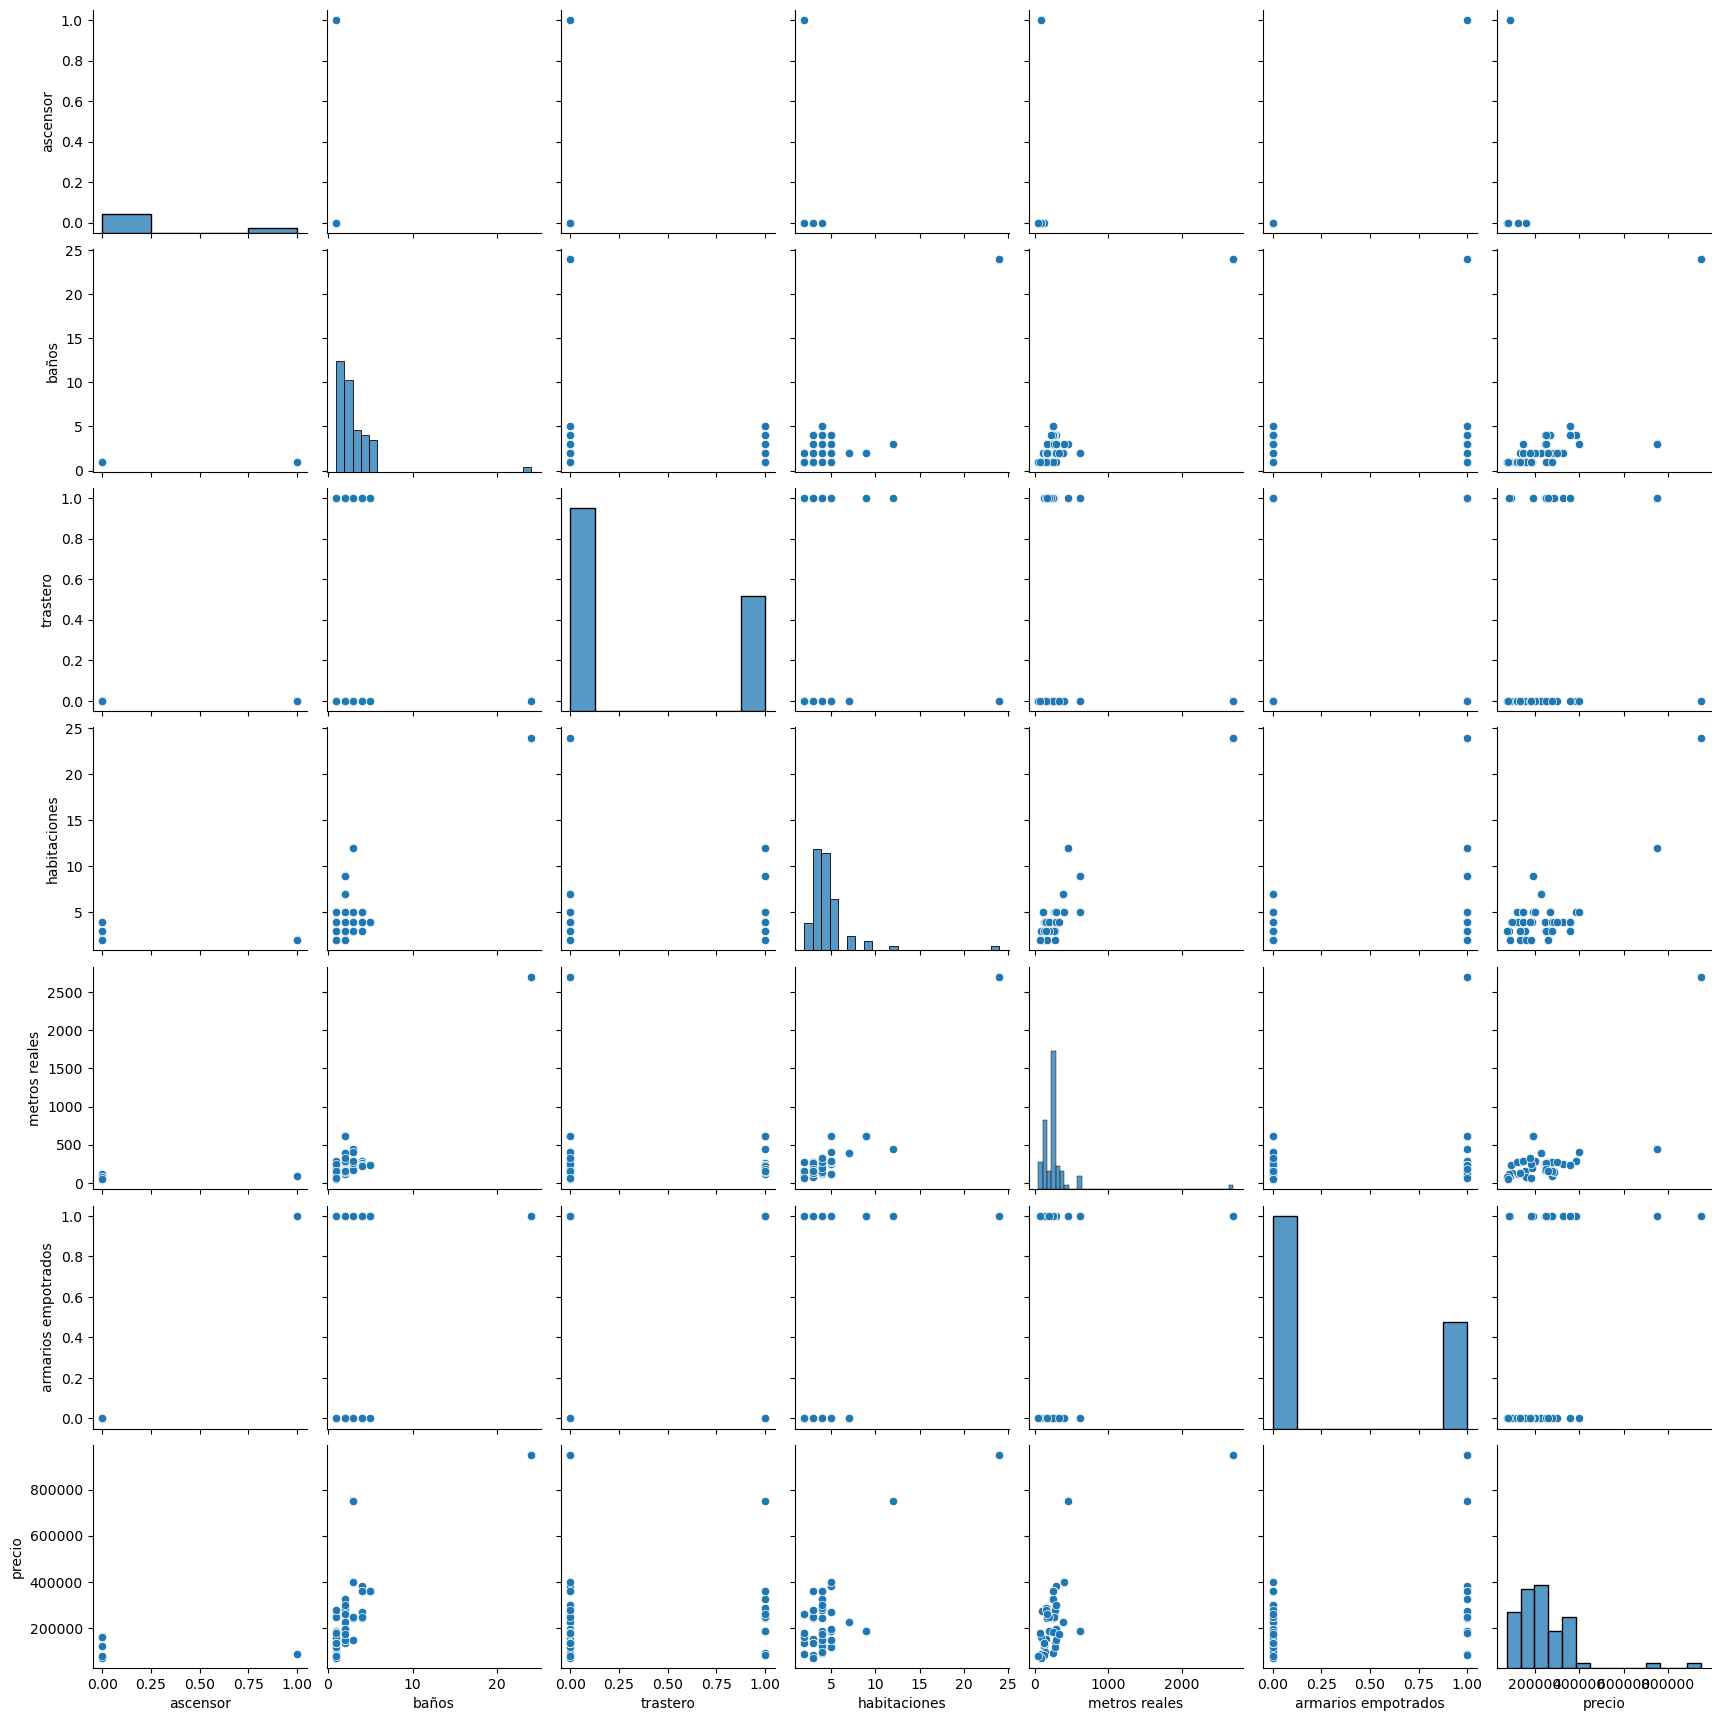

In [707]:
pair_plot = sns.pairplot(df_casas_1[variables_1])
plt.show()

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


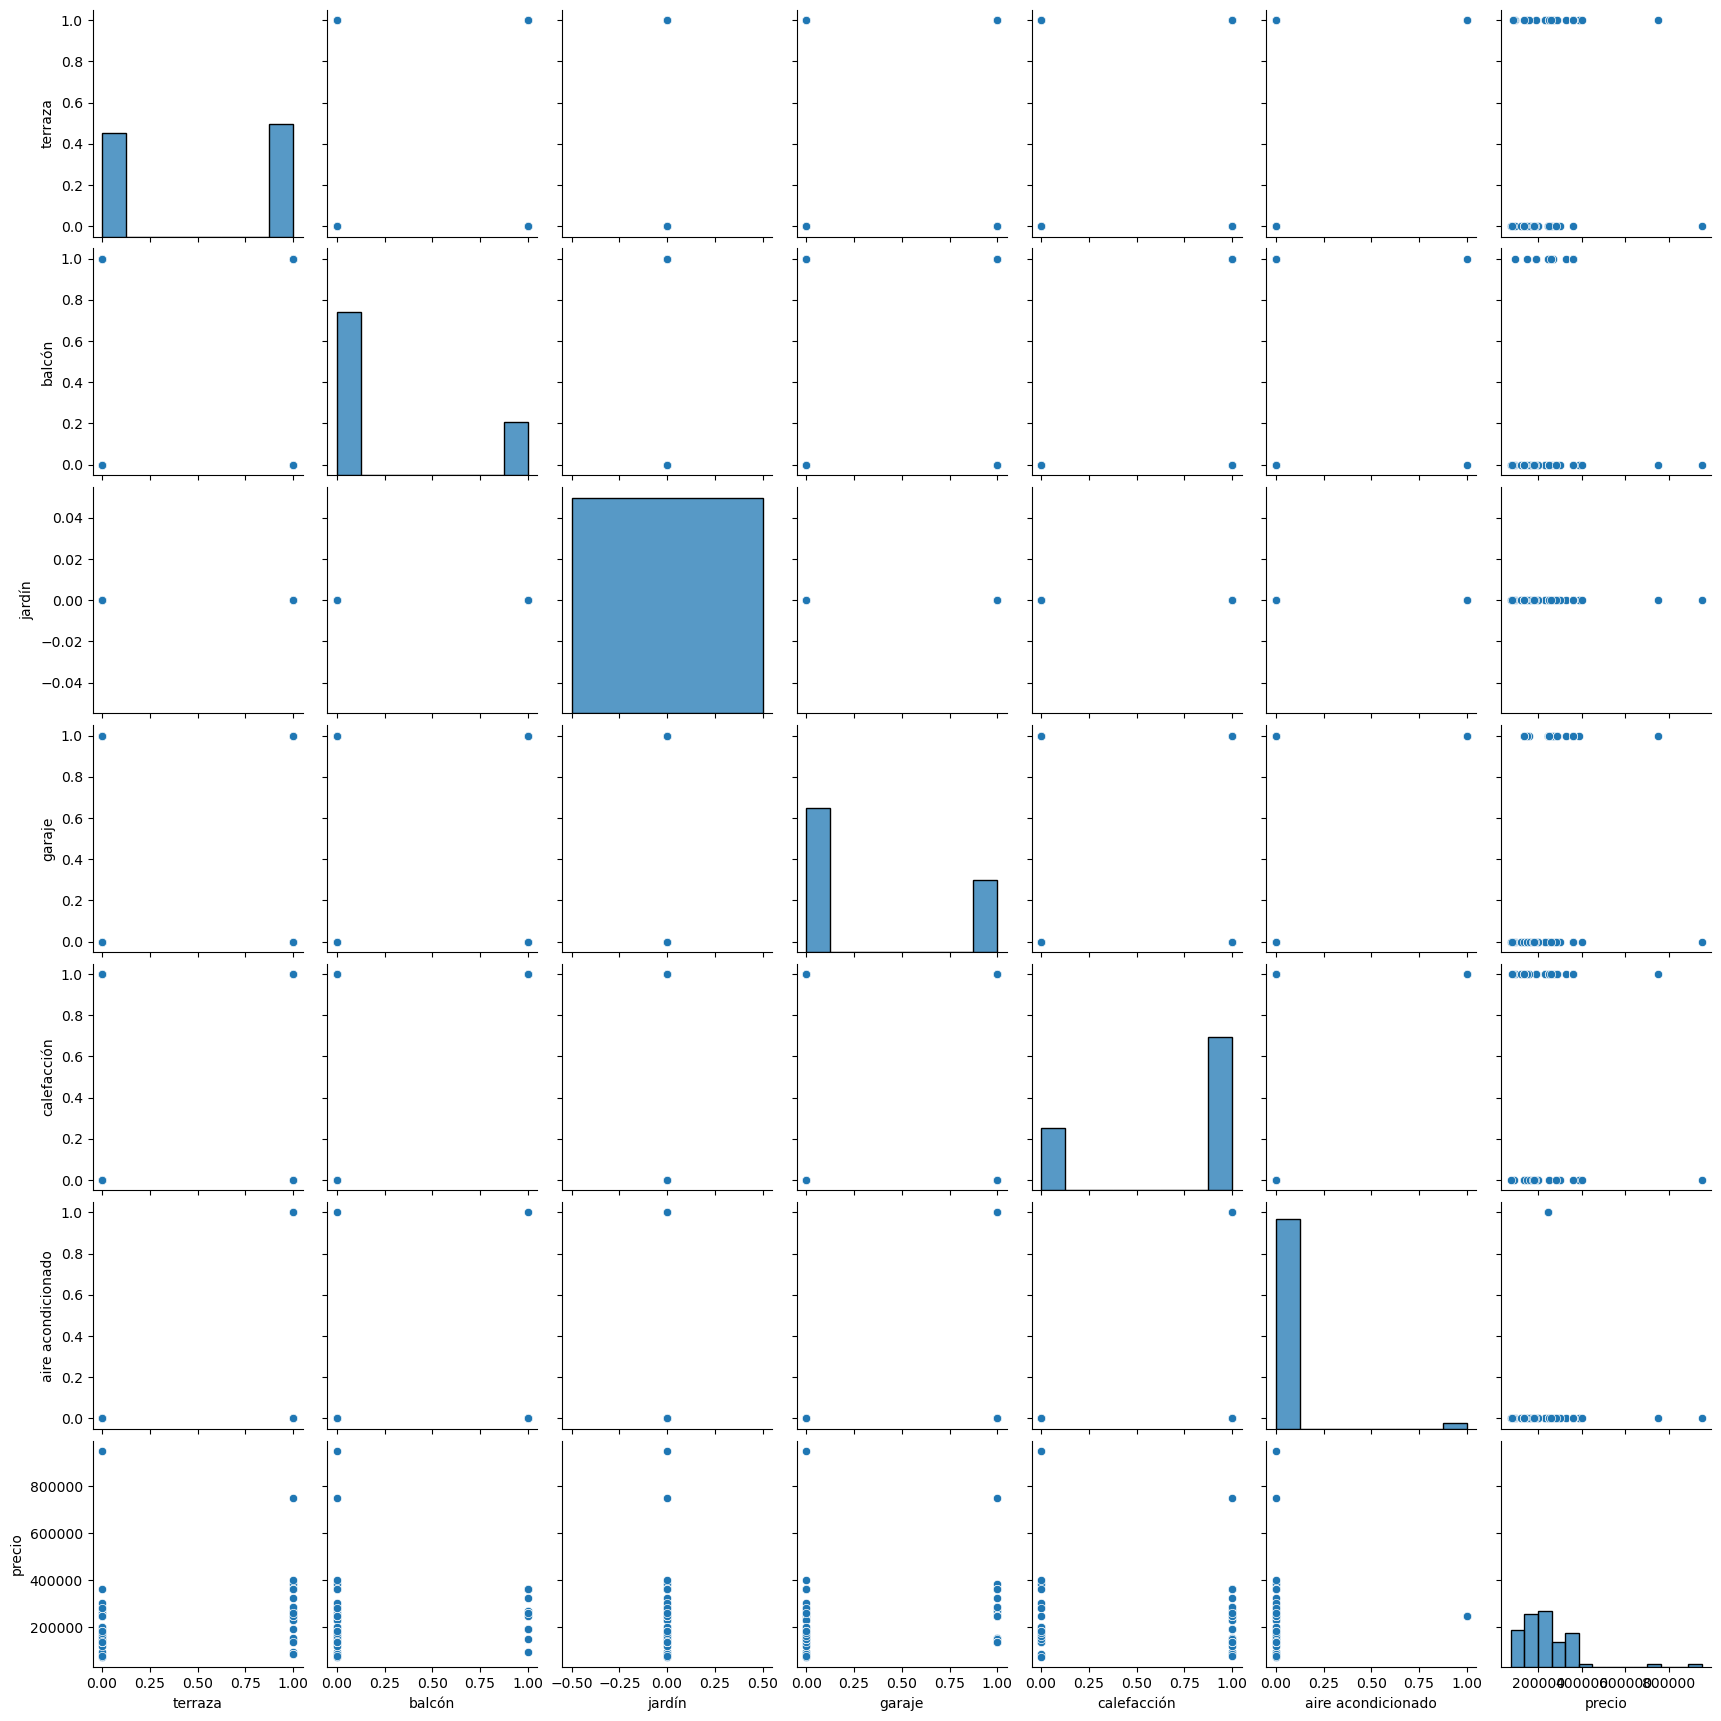

In [708]:
pair_plot = sns.pairplot(df_casas_1[variables_2])
plt.show()

# Precio

<Axes: xlabel='precio', ylabel='Count'>

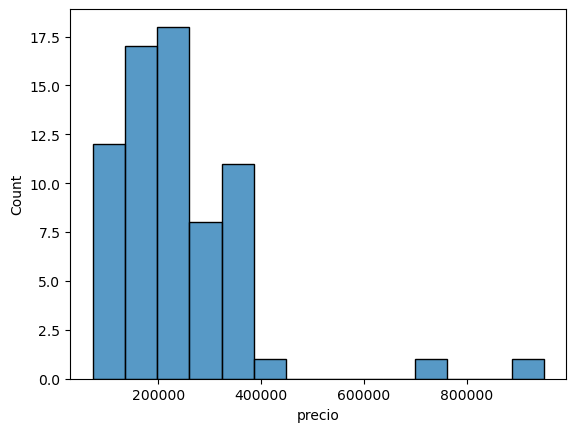

In [709]:
'''Pareciera que solo tenemos dos casas que toman valores muy altos respecto a las otras, tal vez se puedan tratar como outlayers'''
sns.histplot(data = df_casas_1["precio"])

In [710]:
'''Identificar los outlayers'''
df_casas_1.loc[df_casas_1["precio"]>600000]

,Titulo,Localización,precio,ascensor,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
5,Masía en venta en avenida de Sant Llorenç,Sant Llorenç Savall,950000,NaN,24,NaN,0,None,3 plantas,24.0,2700,Segunda mano/buen estado,1,0,0,0,0,0,0
38,Casa o chalet independiente en venta en Sant ...,Vallès Occidental,750000,NaN,3,NaN,1,None,None,12.0,450,Segunda mano/buen estado,1,1,0,0,1,1,0


In [711]:
'''identificar los outlayers'''
df_casas_1.loc[df_casas_1["precio"]<600000]

,Titulo,Localización,precio,ascensor,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,NaN,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,NaN,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,NaN,1,NaN,1,este,4 plantas,4.0,241,Segunda mano/para reformar,0,1,1,0,0,1,0
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,NaN,3,1995.0,1,este,2 plantas,3.0,249,Segunda mano/buen estado,0,1,0,0,0,1,0
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,NaN,5,1975.0,1,None,1 planta,4.0,241,Segunda mano/buen estado,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,NaN,2,NaN,1,None,3 plantas,2.0,160,Segunda mano/buen estado,0,1,1,0,0,1,0
65,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,NaN,3,NaN,0,None,1 planta,5.0,400,Segunda mano/para reformar,0,1,0,0,0,0,0
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,0.0,1,2007.0,0,None,Bajo exterior,NaN,48,Segunda mano/buen estado,0,0,0,0,0,1,0
67,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,NaN,2,1973.0,0,None,None,4.0,329,Segunda mano/buen estado,0,0,0,0,0,0,0


In [712]:
'''Quitar lo outlayers'''
df_casas_1 = df_casas_1[df_casas_1["precio"] < 600000]
df_casas_1

,Titulo,Localización,precio,ascensor,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,NaN,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,NaN,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,NaN,1,NaN,1,este,4 plantas,4.0,241,Segunda mano/para reformar,0,1,1,0,0,1,0
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,NaN,3,1995.0,1,este,2 plantas,3.0,249,Segunda mano/buen estado,0,1,0,0,0,1,0
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,NaN,5,1975.0,1,None,1 planta,4.0,241,Segunda mano/buen estado,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,NaN,2,NaN,1,None,3 plantas,2.0,160,Segunda mano/buen estado,0,1,1,0,0,1,0
65,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,NaN,3,NaN,0,None,1 planta,5.0,400,Segunda mano/para reformar,0,1,0,0,0,0,0
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,0.0,1,2007.0,0,None,Bajo exterior,NaN,48,Segunda mano/buen estado,0,0,0,0,0,1,0
67,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,NaN,2,1973.0,0,None,None,4.0,329,Segunda mano/buen estado,0,0,0,0,0,0,0


# Exploración por cada variable

# Ascensor

In [713]:
'''La variable ascensor apenas son 5 datos de 67 entonces la voy a quitar'''
df_casas_1["ascensor"].value_counts()

ascensor
0.0    4
1.0    1
Name: count, dtype: int64

In [714]:
'''el resto de datos son nulos'''
sum(df_casas_1["ascensor"].isna())

62

In [715]:
'''Se pueden reemplazar por 0 los nulos pero no va a ser útil'''
df_casas_1.loc[df_casas_1["ascensor"].isna(), "ascensor"] = 0

In [716]:
'''Removemos la columna'''
df_casas_1.drop(columns = ["ascensor"], inplace = True)

C:\Users\mateo\AppData\Local\Temp\ipykernel_5544\1613589546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casas_1.drop(columns = ["ascensor"], inplace = True)


# Año

In [717]:
'''Identificar la cantidad de nulos'''
df_casas_1["año"].isna().sum()

'''No debería eliminarse'''
#df_casas_1.drop(columns = ["año"], inplace = True)

'No debería eliminarse'

# Trastero

In [718]:
df_casas_1["trastero"].value_counts()

trastero
0    43
1    24
Name: count, dtype: int64

# Orientación

In [719]:
df_casas_1["orientación"].value_counts()

orientación
sur      7
este     5
norte    2
Name: count, dtype: int64

In [720]:
'''Vamos a agregarle otro elemento llamado None a los nulos en la columna orientación'''
df_casas_1["orientación"] = df_casas_1["orientación"].fillna("None")

C:\Users\mateo\AppData\Local\Temp\ipykernel_5544\3970431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casas_1["orientación"] = df_casas_1["orientación"].fillna("None")


c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


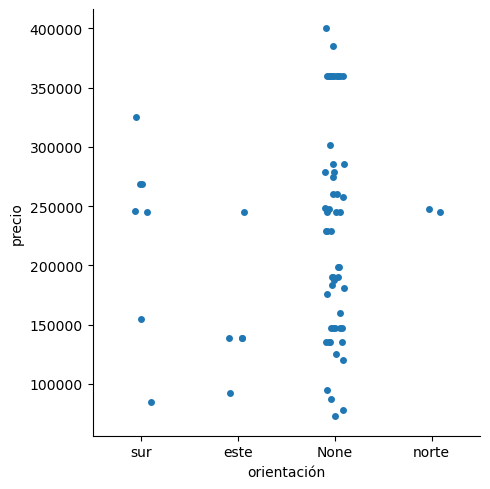

In [721]:
'''Plot del precio vs orientación:

La mayoria de valores son None y no se ve una relación que aporte buena información.'''

sns.catplot(x = "orientación", y= "precio", data = df_casas_1)

In [722]:
'''Eliminar la columna orientación'''
df_casas_1.drop(columns = ["orientación"])

,Titulo,Localización,precio,baños,año,trastero,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,4,1995.0,1,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,4,1995.0,1,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,1,NaN,1,4 plantas,4.0,241,Segunda mano/para reformar,0,1,1,0,0,1,0
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,3,1995.0,1,2 plantas,3.0,249,Segunda mano/buen estado,0,1,0,0,0,1,0
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,5,1975.0,1,1 planta,4.0,241,Segunda mano/buen estado,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,2,NaN,1,3 plantas,2.0,160,Segunda mano/buen estado,0,1,1,0,0,1,0
65,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,3,NaN,0,1 planta,5.0,400,Segunda mano/para reformar,0,1,0,0,0,0,0
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,1,2007.0,0,Bajo exterior,NaN,48,Segunda mano/buen estado,0,0,0,0,0,1,0
67,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,2,1973.0,0,None,4.0,329,Segunda mano/buen estado,0,0,0,0,0,0,0


# Pisos

In [723]:
df_casas_1["piso"].value_counts()

piso
1 planta         24
2 plantas        12
3 plantas         5
4 plantas         5
Bajo exterior     2
Planta 1ª         2
Planta 3ª         1
Name: count, dtype: int64

In [724]:
mapeo = {
    'Bajo exterior': '1 planta',
    'Planta 1ª': '1 planta',
    'Planta 3ª': '3 plantas',
    # Agrega más mapeos si es necesario
}

# Aplicar el mapeo utilizando la función replace
df_casas_1["piso"] = df_casas_1["piso"].replace(mapeo)

# Verificar los resultados
print(df_casas_1["piso"].value_counts())

piso
1 planta     28
2 plantas    12
3 plantas     6
4 plantas     5
Name: count, dtype: int64


C:\Users\mateo\AppData\Local\Temp\ipykernel_5544\1060232913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casas_1["piso"] = df_casas_1["piso"].replace(mapeo)


In [725]:
df_casas_1[df_casas_1["piso"].isna()]

,Titulo,Localización,precio,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
16,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,5,1975.0,0,None,None,4.0,241,Segunda mano/buen estado,0,1,0,0,1,1,0
22,Casa o chalet en venta en calle de les Roses,Sant Llorenç Savall,279000,2,1999.0,0,None,None,4.0,279,Segunda mano/buen estado,0,0,0,0,0,0,0
27,Casa o chalet en venta en calle del Bisbe Solà,Sant Llorenç Savall,190000,2,1960.0,0,None,None,5.0,611,Segunda mano/buen estado,0,1,0,0,0,1,0
31,Casa o chalet en venta en Sant Llorenç Savall,Vallès Occidental,360000,4,1975.0,1,None,None,4.0,241,Segunda mano/buen estado,0,0,0,0,1,0,0
40,Piso en venta en calle de Josep Albagés s/n,Sant Llorenç Savall,135000,2,NaN,0,None,None,3.0,127,Segunda mano/buen estado,0,0,0,0,0,0,0
44,Casa o chalet en venta en Sant Llorenç Savall,Vallès Occidental,248000,4,NaN,1,None,None,3.0,220,Segunda mano/buen estado,0,0,0,0,1,0,0
46,Casa o chalet independiente en venta en calle...,Sant Llorenç Savall,147000,1,NaN,0,None,None,4.0,288,Segunda mano/para reformar,0,0,0,0,0,0,0
55,Casa o chalet en venta en calle dels Lliris,Sant Llorenç Savall,187900,1,1994.0,0,None,None,4.0,197,Segunda mano/buen estado,0,0,0,0,0,0,0
57,Casa o chalet independiente en venta en calle...,Sant Llorenç Savall,301200,2,NaN,0,None,None,4.0,280,Segunda mano/buen estado,0,0,0,0,0,0,0
58,Casa o chalet independiente en venta en calle...,Sant Llorenç Savall,198600,2,NaN,0,None,None,5.0,280,Segunda mano/buen estado,0,0,0,0,0,0,0


In [726]:
'''Busco en la pagina de idealista para corregir la información que falta (no la tenían en la pagina y el script no la cogió)'''

df_casas_1.loc[16, "piso"] = "1 planta"
df_casas_1.loc[22, "piso"] = "2 plantas"
df_casas_1.loc[27, "piso"] = "4 plantas"
df_casas_1.loc[31, "piso"] = "1 planta"
#df_casas_1.loc[38, "piso"] = "3 plantas"
df_casas_1.loc[40, "piso"] = "2 plantas"
df_casas_1.loc[44, "piso"] = "1 planta"
df_casas_1.loc[55, "piso"] = "1 planta"
df_casas_1.loc[57, "piso"] = "2 plantas"
df_casas_1.loc[58, "piso"] = "1 planta"
df_casas_1.loc[59, "piso"] = "1 planta"
df_casas_1.loc[61, "piso"] = "1 planta"
df_casas_1.loc[62, "piso"] = "1 planta"
df_casas_1.loc[63, "piso"] = "2 plantas"
df_casas_1.loc[67, "piso"] = "1 planta"
df_casas_1.loc[68, "piso"] = "1 planta"

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


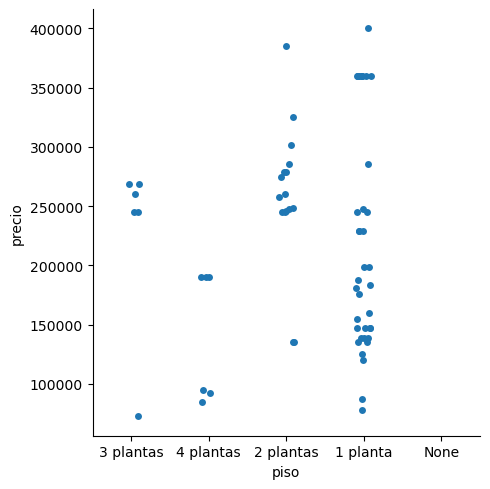

In [727]:
'''Exploración visual'''
sns.catplot(x="piso",y="precio",data=df_casas_1)

# Habitaciones

In [728]:
'''Exploración de datos de habitaciones'''
df_casas_1["habitaciones"].value_counts()

habitaciones
3.0    22
4.0    21
5.0    11
2.0     6
7.0     3
9.0     2
Name: count, dtype: int64

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


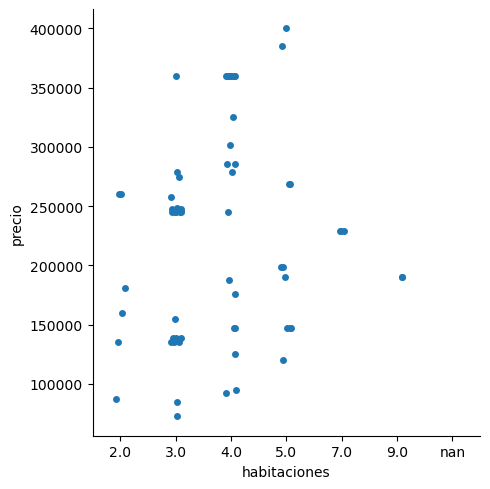

In [729]:
'''Exploración visual'''
sns.catplot(x="habitaciones",y="precio",data=df_casas_1)

In [730]:
df_casas_1[df_casas_1["habitaciones"].isna()]

,Titulo,Localización,precio,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
62,Casa o chalet en venta en Urb. C/ Baixada de ...,Vallès Occidental,183800,1,NaN,0,None,1 planta,NaN,252,Segunda mano/buen estado,0,0,0,0,0,0,0
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,1,2007.0,0,None,1 planta,NaN,48,Segunda mano/buen estado,0,0,0,0,0,1,0


In [731]:
'''Busco en la pagina idealista y corrijo los Nann'''
df_casas_1.loc[62, "habitaciones"] = int(1)
df_casas_1.loc[66, "habitaciones"] = int(1)

# Metros reales

In [732]:
'''Exploración de datos de metros reales'''
df_casas_1["metros reales"].describe()

count     67.000000
mean     234.119403
std      115.819677
min       48.000000
25%      147.000000
50%      241.000000
75%      272.000000
max      611.000000
Name: metros reales, dtype: float64

In [733]:
df_casas_1[df_casas_1["metros reales"].isna()]

,Titulo,Localización,precio,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado


c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


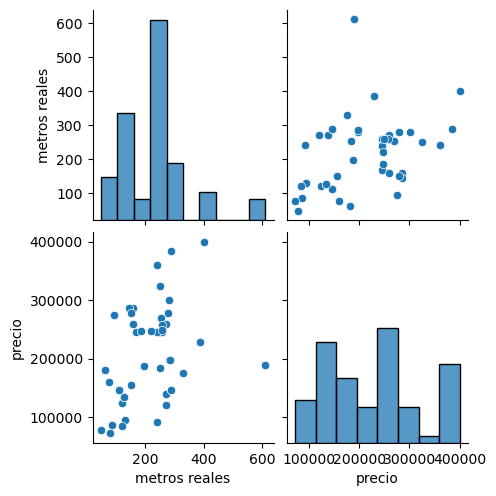

In [734]:
'''Exploración visual:
a más metros, mayor el precio'''
sns.pairplot(df_casas_1[["metros reales", "precio"]])

# Condición

In [735]:
'''Exploración de datos de condición'''
df_casas_1["condición"].value_counts()

condición
Segunda mano/buen estado      53
Segunda mano/para reformar    14
Name: count, dtype: int64

# Armarios empotrados

In [736]:
'''Exploración de datos de armarios empotrados'''
df_casas_1["armarios empotrados"].value_counts()

armarios empotrados
0    46
1    21
Name: count, dtype: int64

# Terraza

In [737]:
'''Exploración de datos de terraza'''
df_casas_1["terraza"].value_counts()

terraza
1    35
0    32
Name: count, dtype: int64

# Balcón

In [738]:
'''Exploración de datos de balcón'''
df_casas_1["balcón"].value_counts()

balcón
0    50
1    17
Name: count, dtype: int64

# Jardín

In [739]:
'''Exploración de datos de jardín'''
df_casas_1["jardín"].value_counts()

jardín
0    67
Name: count, dtype: int64

# Garaje

In [740]:
'''Exploración de datos de garaje'''
df_casas_1["garaje"].value_counts()

garaje
0    45
1    22
Name: count, dtype: int64

# Calefacción

In [741]:
'''Exploración de datos de calefacción'''
df_casas_1["calefacción"].value_counts()

calefacción
1    48
0    19
Name: count, dtype: int64

# Aire acondicionado

In [742]:
'''Exploración de datos de aire acondicionado'''
df_casas_1["aire acondicionado"].value_counts()

aire acondicionado
0    65
1     2
Name: count, dtype: int64

# Guardar DataFrame

In [743]:
df_casas_1.to_csv("03_casas_idealista_filtrado.csv", index = False, sep = ";", encoding = "utf-16")